#Text Analysis
-----

## Text Data: Flattening, Filtering, and Chunking

What would you do if you were designing an algorithm to analyze the following paragraph of text?

    Emma knocked on the door. No answer. She knocked again and waited. There was a large maple tree next to the house. Emma looked up the tree and saw a giant raven perched at the treetop. Under the afternoon sun, the raven gleamed magnificently. Its beak was hard and pointed, its claws sharp and strong. It looked regal and imposing. It reigned the tree it stood on. The raven was looking straight at Emma with its beady black eyes. Emma felt slightly intimidated. She took a step back from the door and tentatively said, “Hello?”

The paragraph contains a lot of information. We know that it involves someone named Emma and a raven. There is a house and a tree, and Emma is trying to get into the house but sees the raven instead. The raven is magnificent and has noticed Emma, who is a little scared but is making an attempt at communication.

So, which parts of this trove of information are salient features that we should extract? To start with, it seems like a good idea to extract the names of the main characters, Emma and the raven. Next, it might also be good to note the setting of a house, a door, and a tree. And what about the descriptions of the raven? What about Emma’s actions—knocking on the door, taking a step back, and saying hello?

This chapter introduces the basics of feature engineering for text. We start out with bag-of-words, which is the simplest representation based on word count statistics. A very much related transformation is tf-idf, which is essentially a feature scaling technique. It is pulled out into its own chapter (the next one) for a full discussion. The current chapter first talks about text extraction features, then delves into how to filter and clean those features.

## Bag-of-X: Turning Natural Text into Flat Vectors

Whether constructing machine learning models or engineering features, it’s nice when the result is simple and interpretable. Simple things are easy to try, and interpretable features and models are easier to debug than complex ones. Simple and interpretable features do not always lead to the most accurate model, but it’s a good idea to start simple and only add complexity when absolutely necessary.
For text data, we can start with a list of word count statistics called a bag-of-words. A list of word counts makes no special effort to find the interesting entities, such as Emma or the raven. But those two words are repeatedly mentioned in our sample paragraph, and they have a higher count than a random word like “hello.” For simple tasks such as classifying a document, word count statistics often suffice. This technique can also be used in information retrieval, where the goal is to retrieve the set of documents that are relevant to an input text query. Both tasks are well served by word-level features because the presence or absence of certain words is a great indicator of the topic content of the document.

Bag-of-Words

In bag-of-words (BoW) featurization, a text document is converted into a vector of counts. (A vector is just a collection of n numbers.) The vector contains an entry for every possible word in the vocabulary. If the word—say, “aardvark”—appears three times in the document, then the feature vector has a count of 3 in the position corresponding to that word. If a word in the vocabulary doesn’t appear in the document, then it gets a count of 0. For example, the text “it is a puppy and it is extremely cute” has the BoW representation shown in Figure 3-1.


![texto alternativo](https://drive.google.com/uc?id=1IbLBEuoCaN8E2ct7788gNOqskefXmUQ4)

Bag-of-words converts a text document into a flat vector. It is “flat” because it doesn’t contain any of the original textual structures. The original text is a sequence of words. But a bag-of-words has no sequence; it just remembers how many times each word appears in the text. Thus, as Figure 3-2 demonstrates, the ordering of words in the vector is not important, as long as it is consistent for all documents in the dataset. Neither does bag-of-words represent any concept of word hierarchy. For example, the concept of “animal” includes “dog,” “cat,” “raven,” etc. But in a bag-of-words representation, these words are all equal elements of the vector.


![texto alternativo](https://drive.google.com/uc?id=1M9wfn4eNsV09yTGNsJIUlYOZv6DyOFss)

What is important here is the geometry of data in feature space. In a bag-of-words vector, each word becomes a dimension of the vector. If there are n words in the vocabulary, then a document becomes a point1 in n-dimensional space. It is difficult to visualize the geometry of anything beyond two or three dimensions, so we will have to use our imagination. Figure 3-3 shows what our example sentence looks like in the two-dimensional feature space corresponding to the words “puppy” and “cute.”

![texto alternativo](https://drive.google.com/uc?id=1V2N1rOUXJIqZndF9bxDkPifxYXkD8Rlp)

Figure 3-4 shows three sentences in a 3D space corresponding to the words “puppy,” “extremely,” and “cute.”

![texto alternativo](https://drive.google.com/uc?id=1YHNStJX1ru7YAKmh6KYcySvW5B7TCuR_)


These figures both depict data vectors in feature space. The axes denote individual words, which are features in the bag-of-words representation, and the points in space denote data points (text documents). Sometimes it is also informative to look at feature vectors in data space. A feature vector contains the value of the feature in each data point. The axes denote individual data points, and the points denote feature vectors. Figure 3-5 shows an example. With bag-of-words featurization for text documents, a feature is a word, and a feature vector contains the counts of this word in each document. In this way, a word is represented as a “bag-of-documents.”  As we shall see in Chapter 4, these bag-of-documents vectors come from the matrix transpose of the bag-of-words vectors.

![texto alternativo](https://drive.google.com/uc?id=1-kP58QvDsOB64ho-29yOWUegXzcHXQFy)

Bag-of-words is not perfect. Breaking down a sentence into single words can destroy the semantic meaning. For instance, “not bad” semantically means “decent” or even “good” (especially if you’re British). But “not” and “bad” constitute a floating negation plus a negative sentiment. “toy dog” and “dog toy” could be very different things (unless it’s a dog toy of a toy dog), and the meaning is lost with the singleton words “toy” and “dog.” It’s easy to come up with many such examples. Bag-of-n-Grams, which we discuss next, alleviates some of the issue but is not a fundamental fix. It’s good to keep in mind that bag-of-words is a simple and useful heuristic, but it is far from a correct semantic understanding of text.

## Bag-of-n-Grams

Bag-of-n-Grams, or bag-of-n-grams, is a natural extension of bag-of-words. An n-gram is a sequence of n tokens. A word is essentially a 1-gram, also known as a unigram. After tokenization, the counting mechanism can collate individual tokens into word counts, or count overlapping sequences as n-grams. For example, the sentence “Emma knocked on the door” generates the n-grams “Emma knocked,” “knocked on,” “on the,” and “the door.”

n-grams retain more of the original sequence structure of the text, and therefore the bag-of-n-grams representation can be more informative. However, this comes at a cost. Theoretically, with k unique words, there could be k2 unique 2-grams (also called bigrams). In practice, there are not nearly so many, because not every word can follow every other word. Nevertheless, there are usually a lot more distinct n-grams (n > 1) than words. This means that bag-of-n-grams is a much bigger and sparser feature space. It also means that n-grams are more expensive to compute, store, and model. The larger n is, the richer the information, and the greater the cost.

To illustrate how the number of n-grams grows with increasing n (see Figure 3-6), let’s compute n-grams on the Yelp reviews dataset. 

In [1]:
import pandas as pd
import json

In [2]:
biz_f = open('yelp_academic_dataset_business.json', encoding='latin1')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()
biz_df.shape


(15585, 15)

In [3]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [5]:
f = open("yelp_academic_dataset_review.json", encoding='latin1')
js = []
for j in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 8)

In [5]:
review_df

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw
...,...,...,...,...,...,...,...,...
9995,"{'funny': 0, 'useful': 2, 'cool': 1}",_eqQoPtQ3e3UxLE4faT6ow,Ubyfp2RSDYW0g7Mbr8N3iA,3,2012-07-28,First visit...Had lunch here today - used my G...,review,VY_tvNUCCXGXQeSvJl757Q
9996,"{'funny': 0, 'useful': 0, 'cool': 0}",ROru4uk5SaYc3rg8IU7SQw,2XyIOQKbVFb6uXQdJ0RzlQ,4,2012-01-18,Should be called house of deliciousness!\n\nI ...,review,EKzMHI1tip8rC1-ZAy64yg
9997,"{'funny': 0, 'useful': 0, 'cool': 0}",gGbN1aKQHMgfQZkqlsuwzg,jyznYkIbpqVmlsZxSDSypA,4,2010-11-16,I recently visited Olive and Ivy for business ...,review,53YGfwmbW73JhFiemNeyzQ
9998,"{'funny': 0, 'useful': 0, 'cool': 0}",0lyVoNazXa20WzUyZPLaQQ,5UKq9WQE1qQbJ0DJbc-B6Q,2,2012-12-02,My nephew just moved to Scottsdale recently so...,review,9SKdOoDHcFoxK5ZtsgHJoA


In [6]:
review_df

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw
...,...,...,...,...,...,...,...,...
9995,"{'funny': 0, 'useful': 2, 'cool': 1}",_eqQoPtQ3e3UxLE4faT6ow,Ubyfp2RSDYW0g7Mbr8N3iA,3,2012-07-28,First visit...Had lunch here today - used my G...,review,VY_tvNUCCXGXQeSvJl757Q
9996,"{'funny': 0, 'useful': 0, 'cool': 0}",ROru4uk5SaYc3rg8IU7SQw,2XyIOQKbVFb6uXQdJ0RzlQ,4,2012-01-18,Should be called house of deliciousness!\n\nI ...,review,EKzMHI1tip8rC1-ZAy64yg
9997,"{'funny': 0, 'useful': 0, 'cool': 0}",gGbN1aKQHMgfQZkqlsuwzg,jyznYkIbpqVmlsZxSDSypA,4,2010-11-16,I recently visited Olive and Ivy for business ...,review,53YGfwmbW73JhFiemNeyzQ
9998,"{'funny': 0, 'useful': 0, 'cool': 0}",0lyVoNazXa20WzUyZPLaQQ,5UKq9WQE1qQbJ0DJbc-B6Q,2,2012-12-02,My nephew just moved to Scottsdale recently so...,review,9SKdOoDHcFoxK5ZtsgHJoA


In [7]:
review_df["text"][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

bow_converter = CountVectorizer(token_pattern="(?u)\\b\\w+\\b")

# expresión regular
# (?u) es unicode
# \bword\b
# w+ es 'one or more word characters'


In [10]:
x = bow_converter.fit_transform(review_df["text"])
x

<10000x29222 sparse matrix of type '<class 'numpy.int64'>'
	with 862360 stored elements in Compressed Sparse Row format>

In [11]:
words = bow_converter.get_feature_names()
len(words)

29222

In [12]:
words[:10]

['0', '00', '000', '007', '00a', '00am', '00pm', '01', '02', '03']

In [13]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern="(?u)\\b\\w+\\b")
x2 = bigram_converter.fit_transform(review_df["text"])

# tomamos las palabras solo de 2 en 2

In [14]:
bigrams = bigram_converter.get_feature_names()
len(bigrams)

368943

In [15]:
bigrams[135:145]

['000 sedona',
 '000 students',
 '000 thats',
 '000 they',
 '000 words',
 '007 blood',
 '00a and',
 '00am 5',
 '00am as',
 '00am before']

In [16]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern="(?u)\\b\\w+\\b")
x3 = trigram_converter.fit_transform(review_df["text"])

In [17]:
trigrams = trigram_converter.get_feature_names()
len(trigrams)

881620

In [18]:
trigrams[:10]

['0 0 eye',
 '0 20 less',
 '0 39 oz',
 '0 39 pizza',
 '0 5 i',
 '0 50 to',
 '0 6 can',
 '0 75 oysters',
 '0 75 that',
 '0 75 to']

In [19]:
print(len(words), len(bigrams), len(trigrams))

29222 368943 881620


In [20]:
# Entendiendo bien las palabras, bigramas y trigramas
ejemplo_n_gramas = CountVectorizer(ngram_range=(1,1))
print(ejemplo_n_gramas.fit(["an apple a day keeps the doctor away"]).vocabulary_)


{'an': 0, 'apple': 1, 'day': 3, 'keeps': 5, 'the': 6, 'doctor': 4, 'away': 2}


In [21]:
# Entendiendo bien las palabras, bigramas y trigramas
ejemplo_n_gramas = CountVectorizer(ngram_range=(1,2))
print(ejemplo_n_gramas.fit(["an apple a day keeps the doctor away"]).vocabulary_)


{'an': 0, 'apple': 2, 'day': 5, 'keeps': 9, 'the': 11, 'doctor': 7, 'away': 4, 'an apple': 1, 'apple day': 3, 'day keeps': 6, 'keeps the': 10, 'the doctor': 12, 'doctor away': 8}


In [22]:
# Entendiendo bien las palabras, bigramas y trigramas
ejemplo_n_gramas = CountVectorizer(ngram_range=(1,3))
print(ejemplo_n_gramas.fit(["an apple a day keeps the doctor away"]).vocabulary_)


{'an': 0, 'apple': 3, 'day': 7, 'keeps': 12, 'the': 15, 'doctor': 10, 'away': 6, 'an apple': 1, 'apple day': 4, 'day keeps': 8, 'keeps the': 13, 'the doctor': 16, 'doctor away': 11, 'an apple day': 2, 'apple day keeps': 5, 'day keeps the': 9, 'keeps the doctor': 14, 'the doctor away': 17}


In [23]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm

C:\Users\Admin\AppData\Local\Temp/ipykernel_39888/689828577.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


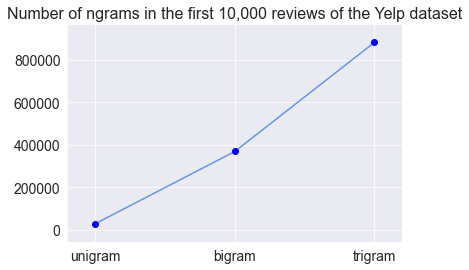

In [24]:
sns.set_style("darkgrid")
counts = [len(words), len(bigrams), len(trigrams)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

In [25]:
"""
Number of Words in a bigram is greater than the number of words in a unigram. Similarly, number of words in a trigram is greater than the number of words in a bigram.

This is true if you would perform it on an actual dataset that contains many strings. If you would perform it on a single string then the result would be the opposite.

Let us understand it with the help of an example. Let us say string 1 contains: w1,w2,w3,w4,w5,w6 and string 2 contains: w1,w7,w3,w2,w5,w4,w6. so total no of unigrams over here is {w1,w2,w3,w4,w5,w6,w7}. So total number of words in unigram is 7.

Now let us see in the case of a bigram. Total number of words in bigrams are:

 {(w1,w2),(w2,w3),(w3,w4),(w4,w5),(w5,w6),(w1,w7),(w7,w3),(w3,w2),(w2,w5),(w5,w4),(w4,w6)}
So total no of words in bigram over here is 11.

This happens because there are many words that repeat in case of unigram but in case of bigram fewer words repeat and in case of trigrams even lesser number of words would repeat. As you would increase the value of n in n-grams fewer number of words would start to repeat and hence the number of words increases as you increase in the value of n in n-grams.



Si no tuvieses palabras repetidas entonces sí que los bigramas serían menos que los unigramas y los trigramas serían todavía menores que los demás.

"""

'\nNumber of Words in a bigram is greater than the number of words in a unigram. Similarly, number of words in a trigram is greater than the number of words in a bigram.\n\nThis is true if you would perform it on an actual dataset that contains many strings. If you would perform it on a single string then the result would be the opposite.\n\nLet us understand it with the help of an example. Let us say string 1 contains: w1,w2,w3,w4,w5,w6 and string 2 contains: w1,w7,w3,w2,w5,w4,w6. so total no of unigrams over here is {w1,w2,w3,w4,w5,w6,w7}. So total number of words in unigram is 7.\n\nNow let us see in the case of a bigram. Total number of words in bigrams are:\n\n {(w1,w2),(w2,w3),(w3,w4),(w4,w5),(w5,w6),(w1,w7),(w7,w3),(w3,w2),(w2,w5),(w5,w4),(w4,w6)}\nSo total no of words in bigram over here is 11.\n\nThis happens because there are many words that repeat in case of unigram but in case of bigram fewer words repeat and in case of trigrams even lesser number of words would repeat. As 

## Filtering for Cleaner Features

With words, how do we cleanly separate the signal from the noise? Through filtering, techniques that use raw tokenization and counting to generate lists of simple words or n-grams become more usable. Phrase detection, which we will discuss next, can be seen as a particular bigram filter. Here are a few more ways to perform filtering.

### Stopwords

Classification and retrieval do not usually require an in-depth understanding of the text. For instance, in the sentence “Emma knocked on the door,” the words “on” and “the” don’t change the fact that this sentence is about a person and a door. For coarse-grained tasks such as classification, the pronouns, articles, and prepositions may not add much value. The case may be very different in sentiment analysis, which requires a fine-grained understanding of semantics.

The popular Python NLP package NLTK contains a linguist-defined stopword list for many languages. (You will need to install NLTK and run nltk.download() to get all the goodies.) Various stopword lists can also be found on the web. For instance, here are some sample words from the English stopword list:

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words("english")[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Note that the list contains apostrophes, and the words are uncapitalized. In order to use it as is, the tokenization process must not eat up apostrophes, and the words need to be converted to lowercase.

## Frequency-Based Filtering

Stopword lists are a way of weeding out common words that make for vacuous features. There are other, more statistical ways of getting at the concept of “common words.” In collocation extraction, we see methods that depend on manual definitions, and those that use statistics. The same idea applies to word filtering. We can use frequency statistics here as well.

### Frequent words

Frequency statistics are great for filtering out corpus-specific common words as well as general-purpose stopwords. For instance, the phrase “New York Times” and each of the individual words in it appear frequently in the New York Times Annotated Corpus dataset. Similarly, the word “house” appears often in the phrase “House of Commons” in the Hansard corpus of Canadian parliament debates, a dataset that is popularly used for statistical machine translation because it contains both an English and a French version of all documents. These words are meaningful in general, but not within those particular corpora. A typical stopword list will catch the general stopwords, but not corpus-specific ones.

Looking at the most frequent words can reveal parsing problems and highlight normally useful words that happen to appear too many times in the corpus. For example, Table 3-1 lists the 40 most frequent words in the Yelp reviews dataset. Here, frequency is based on the number of documents (reviews) they appear in, not their count within a document. As we can see, the list includes many stopwords. It also contains some surprises. “s” and “t” are on the list because we used the apostrophe as a tokenization delimiter, and words such as “Mary’s” or “didn’t” got parsed as “Mary s” and “didn t.” Furthermore, the words “good,” “food,” and “great” each appear in around a third of the reviews, but we might want to keep them around because they are very useful for tasks such as sentiment analysis or business categorization.

![texto alternativo](https://drive.google.com/uc?id=10t_e8ghb0288snEPVr1TdWDjBlhiYxjW)

In practice, it helps to combine frequency-based filtering with a stopword list. There is also the tricky question of where to place the cutoff. Unfortunately there is no universal answer. Most of the time the cutoff needs to be determined manually, and may need to be reexamined when the dataset changes.

### Rare words

Depending on the task, one might also need to filter out rare words. These might be truly obscure words, or misspellings of common words. To a statistical model, a word that appears in only one or two documents is more like noise than useful information. For example, suppose the task is to categorize businesses based on their Yelp reviews, and a single review contains the word “gobbledygook.” How would one tell, based on this one word, whether the business is a restaurant, a beauty salon, or a bar? Even if we knew that the business in this case happened to be a bar, it would probably be a mistake to classify as such for other reviews that contain the word “gobbledygook.”

Not only are rare words unreliable as predictors, they also generate computational overhead. The set of 1.6 million Yelp reviews contains 357,481 unique words (tokenized by space and punctuation characters), 189,915 of which appear in only one review, and 41,162 in two reviews. Over 60% of the vocabulary occurs rarely. This is a so-called heavy-tailed distribution, and it is very common in real-world data. The training time of many statistical machine learning models scales linearly with the number of features, and some models are quadratic or worse. Rare words incur a large computation and storage cost for not much additional gain.

Rare words can be easily identified and trimmed based on word count statistics. Alternatively, their counts can be aggregated into a special garbage bin, which can serve as an additional feature. Figure 3-7 demonstrates this representation on a short document that contains a bunch of usual words and two rare words, “gobbledygook” and “zylophant.” The usual words retain their own counts, which can be further filtered by stopword lists or other frequency-based methods. The rare words lose their identity and get grouped into a garbage bin feature.

![texto alternativo](https://drive.google.com/uc?id=1jIU48-yVo2peJryvIvLWdVodVROWxJ5h)



Since one won’t know which words are rare until the whole corpus has been counted, the garbage bin feature will need to be collected as a post-processing step.

Since this book is about feature engineering, our focus is on features. But the concept of rarity also applies to data points. If a text document is very short, then it likely contains no useful information and should not be used when training a model. One must use caution when applying this rule, however. The Wikipedia dump contains many pages that are incomplete stubs, which are probably safe to filter out. Tweets, on the other hand, are inherently short, and require other featurization and modeling tricks.


## Stemming

One problem with simple parsing is that different variations of the same word get counted as separate words. For instance, “flower” and “flowers” are technically different tokens, and so are “swimmer,” “swimming,” and “swim,” even though they are very close in meaning. It would be nice if all of these different variations got mapped to the same word.

Stemming is an NLP task that tries to chop each word down to its basic linguistic word stem form. There are different approaches. Some are based on linguistic rules, others on observed statistics. A subclass of algorithms incorporate part-of-speech tagging and linguistic rules in a process known as lemmatization.

Most stemming tools focus on the English language, though efforts are ongoing for other languages. The Porter stemmer is the most widely used free stemming tool for the English language. The original program is written in ANSI C, but many other packages have since wrapped it to provide access to other languages.

Here is an example of running the Porter stemmer through the NLTK Python package. As you can see, it handles a large number of cases, but it’s not perfect. The word “goes” is mapped to “goe,” while “go” is mapped to itself:

![texto alternativo](https://drive.google.com/uc?id=19m3iQWTeyzgVMZ_ncjtwJL2vTOGWzZYi)

Stemming does have a computation cost. Whether the end benefit outweighs the cost is application-dependent. It is also worth noting that stemming could hurt more than it helps. The words “new” and “news” have very different meanings, but both would be stemmed to “new.” Similar examples abound. For this reason, stemming is not always used.


## Atoms of Meaning: From Words to n-Grams to Phrases

The concept of bag-of-words is straightforward. But how does a computer know what a word is? A text document is represented digitally as a string, which is basically a sequence of characters. One might also run into semi-structured text in the form of JSON blobs or HTML pages. But even with the added tags and structure, the basic unit is still a string. How does one turn a string into a sequence of words? This involves the tasks of parsing and tokenization, which we discuss next.

### Parsing and Tokenization

Parsing is necessary when the string contains more than plain text. For instance, if the raw data is a web page, an email, or a log of some sort, then it contains additional structure. One needs to decide how to handle the markup, the headers and footers, or the uninteresting sections of the log. If the document is a web page, then the parser needs to handle URLs. If it is an email, then fields like From, To, and Subject may require special handling—otherwise these headers will end up as normal words in the final count, which may not be useful.

After light parsing, the plain-text portion of the document can go through tokenization. This turns the string—a sequence of characters—into a sequence of tokens. Each token can then be counted as a word. The tokenizer needs to know what characters indicate that one token has ended and another is beginning. Space characters are usually good separators, as are punctuation characters. If the text contains tweets, then hash marks (#) should not be used as separators (also known as delimiters).

Sometimes, the analysis needs to operate on sentences instead of entire documents. For instance, n-grams, a generalization of the concept of a word, should not extend beyond sentence boundaries. More complex text featurization methods like word2vec also work with sentences or paragraphs. In these cases, one needs to first parse the document into sentences, then further tokenize each sentence into words.

### Collocation Extraction for Phrase Detection


A sequence of tokens immediately yields the list of words and n-grams. Semantically speaking, however, we are more used to understanding phrases, not n-grams. In computational natural language processing (NLP), the concept of a useful phrase is called a collocation. In the words of Manning and Schütze (1999: 151), “A collocation is an expression consisting of two or more words that correspond to some conventional way of saying things.”

Collocations are more meaningful than the sum of their parts. For instance, “strong tea” has a different meaning beyond “great physical strength” and “tea”; therefore, it is considered a collocation. The phrase “cute puppy,” on the other hand, means exactly the sum of its parts: “cute” and “puppy.” Thus, it is not considered a collocation.

Collocations do not have to be consecutive sequences. For example, the sentence “Emma knocked on the door” is considered to contain the collocation “knock door.” Hence, not every collocation is an n-gram. Conversely, not every n-gram is deemed a meaningful collocation.

Because collocations are more than the sum of their parts, their meaning cannot be adequately captured by individual word counts. Bag-of-words falls short as a representation. Bag-of-n-grams is also problematic because it captures too many meaningless sequences (consider “this is” in the bag-of-n-grams example) and not enough of the meaningful ones (i.e., knock door).

Collocations are useful as features. But how does one discover and extract them from text? One way is to predefine them. If we tried really hard, we could probably find comprehensive lists of idioms in various languages, and we could look through the text for any matches. It would be very expensive, but it would work. If the corpus is very domain specific and contains esoteric lingo, then this might be the preferred method. But the list would require a lot of manual curation, and it would need to be constantly updated for evolving corpora. For example, it probably wouldn’t be very realistic for analyzing tweets, or for blogs and articles.

Since the advent of statistical NLP in the last two decades, people have opted more and more for statistical methods for finding phrases. Instead of establishing a fixed list of phrases and idiomatic sayings, statistical collocation extraction methods rely on the ever-evolving data to reveal the popular sayings of the day.

### Frequency-based methods

A simple hack is to look at the most frequently occurring n-grams. The problem with this approach is that the most frequently occurring ones may not be the most useful ones. Table 3-2 shows the most popular bigrams ( n = 2 ) in the entire Yelp reviews dataset. As we can see, the top 10 most frequently occurring bigrams by document count are very generic terms that don’t contain much meaning.

![texto alternativo](https://drive.google.com/uc?id=1qKEnujZ3oa6Mph8_CuqB7c1Xb0rbF6Dk)

### Hypothesis testing for collocation extraction

Raw popularity count is too crude of a measure. We have to find more clever statistics to be able to pick out meaningful phrases easily. The key idea is to ask whether two words appear together more often than they would by chance. The statistical machinery for answering this question is called a hypothesis test.

Hypothesis testing is a way to boil noisy data down to “yes” or “no” answers. It involves modeling the data as samples drawn from random distributions. The randomness means that one can never be 100% sure about the answer; there’s always the chance of an outlier. So, the answers are attached to a probability.

For example, the outcome of a hypothesis test might be “these two datasets come from the same distribution with 95% probability.” For a gentle introduction to hypothesis testing, see the Khan Academy’s tutorial on Hypothesis Testing and p-Values.

In the context of collocation extraction, many hypothesis tests have been proposed over the years.  One of the most successful methods is based on the likelihood ratio test (Dunning, 1993). For a given pair of words, the method tests two hypotheses on the observed dataset. Hypothesis 1 (the null hypothesis) says that word 1 appears independently from word 2. Another way of saying this is that seeing word 1 has no bearing on whether we also see word 2. Hypothesis 2 (the alternate hypothesis) says that seeing word 1 changes the likelihood of seeing word 2. We take the alternate hypothesis to imply that the two words form a common phrase. Hence, the likelihood ratio test for phrase detection (a.k.a. collocation extraction) asks the following question: are the observed word occurrences in a given text corpus more likely to have been generated from a model where the two words occur independently from one another, or a model where the probabilities of the two words are entangled?

That is a mouthful. Let’s math it up a little. (Math is great at expressing things very precisely and concisely, but it does require a completely different parser than natural language.)

We can express the null hypothesis Hnull (independent) as P(w2 | w1) = P(w2 | not w1), and the alternate hypothesis Halternate (not independent) as P(w2 | w1) ≠ P(w2 | not w1).

The final statistic is the log of the ratio between the two:

log λ = log L ( Data; H null ) L ( Data; H alternate ) . #formatear

The likelihood function L(Data; H) represents the probability of seeing the word frequencies in the dataset under the independent or the not independent model for the word pair. In order to compute this probability, we have to make another assumption about how the data is generated. The simplest data generation model is the binomial model, where for each word in the dataset, we toss a coin, and we insert our special word if the coin comes up heads, and some other word otherwise. Under this strategy, the count of the number of occurrences of the special word follows a binomial distribution. The binomial distribution is completely determined by the total number of words, the number of occurrences of the word of interest, and the heads probability.

The algorithm for detecting common phrases through likelihood ratio test analysis proceeds as follows:

    Compute occurrence probabilities for all singleton words: P(w).
    Compute conditional pairwise word occurrence probabilities for all unique bigrams: P(w2 | w1).
    Compute the likelihood ratio log λ for all unique bigrams.
    Sort the bigrams based on their likelihood ratio.
    Take the bigrams with the smallest likelihood ratio values as features.


There is another statistical approach that’s based on pointwise mutual information, but it is very sensitive to rare words, which are always present in real-world text corpora. Hence, it is not commonly used and we will not be demonstrating it here.

Note that all of the statistical methods for collocation extraction, whether using raw frequency, hypothesis testing, or pointwise mutual information, operate by filtering a list of candidate phrases. The easiest and cheapest way to generate such a list is by counting n-grams. It’s possible to generate nonconsecutive sequences, but they are expensive to compute. In practice, even for consecutive n-grams, people rarely go beyond bigrams or trigrams because there are too many of them, even after filtering. To generate longer phrases, there are other methods such as chunking or combining with part-of-speech (PoS) tagging.


### Chunking and part-of-speech tagging

Chunking is a bit more sophisticated than finding n-grams, in that it forms sequences of tokens based on parts of speech, using rule-based models.

For example, we might be most interested in finding all of the noun phrases in a problem where the entity (in this case the subject of a text) is the most interesting to us. In order to find this, we tokenize each word with a part of speech and then examine the token’s neighborhood to look for part-of-speech groupings, or “chunks.” The models that map words to parts of speech are generally language specific. Several open source Python libraries, such as NLTK, spaCy, and TextBlob, have multiple language models available. 

To  illustrate how several libraries in Python make chunking using PoS tagging fairly straightforward, let’s use the Yelp reviews dataset again. In Example 3-2, we evaluate the parts of speech to find the noun phrases using both spaCy and TextBlob.



In [27]:
f = open("yelp_academic_dataset_review.json")
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10, 8)

### Using spacy: [Installation instructions for spacy](https://spacy.io/docs/usage/)

In [29]:
!pip install nltk

!pip install spacy

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

!pip install pyresparser





     ---------------------------------------- 12.0/12.0 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [30]:
import spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [31]:

nlp = spacy.load("en_core_web_sm")

In [32]:
spacy.info("en_core_web_sm")


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.3.1                         
spacy_version    >=2.3.0,<2.4.0                
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

{'lang': 'en',
 'name': 'core_web_sm',
 'license': 'MIT',
 'author': 'Explosion',
 'url': 'https://explosion.ai',
 'email': 'contact@explosion.ai',
 'description': 'English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
 'sources': [{'name': 'OntoNotes 5',
   'url': 'https://catalog.ldc.upenn.edu/LDC2013T19',
   'license': 'commercial (licensed by Explosion)'}],
 'pipeline': ['tagger', 'parser', 'ner'],
 'version': '2.3.1',
 'spacy_version': '>=2.3.0,<2.4.0',
 'parent_package': 'spacy',
 'accuracy': {'las': 89.7572754092,
  'uas': 91.6570115569,
  'token_acc': 99.756964111,
  'las_per_type': {'advmod': {'p': 85.6065101297,
    'r': 84.9512113055,
    'f': 85.2776018577},
   'aux': {'p': 97.9464841319, 'r': 98.0772654442, 'f': 98.0118311613},
   'nsubj': {'p': 95.530627567, 'r': 94.7522887555, 'f': 95.1398662913},
   'root': {'p': 89.5162856958, 'r': 91.1692936754, 'f': 90.3352283866},
   'compound': {'p': 90

In [33]:
doc_df = review_df["text"].apply(nlp)
type(doc_df)

pandas.core.series.Series

In [34]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [35]:
doc_df[4]

General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it's how we recover from them that is important"!!!

Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)

In [36]:
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

General PROPN NNP
Manager PROPN NNP
Scott PROPN NNP
Petello PROPN NNP
is AUX VBZ
a DET DT
good ADJ JJ
egg NOUN NN
! PUNCT .
! PUNCT .
! PUNCT .
Not PART RB
to PART TO
go VERB VB
into ADP IN
detail NOUN NN
, PUNCT ,
but CCONJ CC
let VERB VB
me PRON PRP
assure VERB VB
you PRON PRP
if SCONJ IN
you PRON PRP
have AUX VBP
any DET DT
issues NOUN NNS
( PUNCT -LRB-
albeit SCONJ IN
rare ADJ JJ
) PUNCT -RRB-
speak VERB VBP
with ADP IN
Scott PROPN NNP
and CCONJ CC
treat VERB VB
the DET DT
guy NOUN NN
with ADP IN
some DET DT
respect NOUN NN
as SCONJ IN
you PRON PRP
state VERB VBP
your DET PRP$
case NOUN NN
and CCONJ CC
I PRON PRP
'd VERB MD
be AUX VB
surprised ADJ JJ
if SCONJ IN
you PRON PRP
do AUX VBP
n't PART RB
walk VERB VB
out ADP RP
totally ADV RB
satisfied ADJ JJ
as SCONJ IN
I PRON PRP
just ADV RB
did AUX VBD
. PUNCT .
Like INTJ UH
I PRON PRP
always ADV RB
say VERB VBP
..... PUNCT NFP
" PUNCT ``
Mistakes NOUN NNS
are AUX VBP
inevitable ADJ JJ
, PUNCT ,
it PRON PRP
's AUX VBZ
how ADV WRB
we PR

In [37]:
spacy.explain("UH")

'interjection'

In [38]:
print([chunk for chunk in doc_df[4].noun_chunks])


[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, Thanks, Scott, his awesome staff, You, a customer, life, :^]


### Using [Textblob](https://textblob.readthedocs.io/en/dev/)

In [39]:
!pip install textblob

In [40]:
from textblob import TextBlob

The default tagger in TextBlob uses the PatternTagger, the same as [pattern](https://www.clips.uantwerpen.be/pattern), which is fine for our example. To use the NLTK tagger, we can specify the pos_tagger when we call TextBlob. More [here](http://textblob.readthedocs.io/en/dev/advanced_usage.html#advanced).

In [41]:
blob_df = review_df["text"].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [42]:
type(blob_df[4])

textblob.blob.TextBlob

In [44]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

# The Effects of Feature Scaling: From Bag-of-Words to Tf-Idf

A bag-of-words representation is simple to generate but far from perfect. If we count all words equally, then some words end up being emphasized more than we need. Recall our example of Emma and the raven from Chapter 3. We’d like a document representation that emphasizes the two main characters. The words “Emma” and “raven” both appear three times, but “the” appears a whopping eight times, “and” appears five times, and “it” and “was” both appear four times. The main characters do not stand out by simple frequency count alone. This is problematic.

It would also be nice to pick out words such as “magnificently,” “gleamed,” “intimidated,” “tentatively,” and “reigned,” because they help to set the overall tone of the paragraph. They indicate sentiment, which can be very valuable information to a data scientist. So, ideally, we’d like a representation that highlights meaningful words.
Tf-Idf : A Simple Twist on Bag-of-Words

Tf-Idf: Term frequency Inverse document frequency

Tf-idf is a simple twist on the bag-of-words approach. It stands for term frequency–inverse document frequency.  Instead of looking at the raw counts of each word in each document in a dataset, tf-idf looks at a normalized count where each word count is divided by the number of documents this word appears in. That is:

bow(w, d) = # times word w appears in document d

tf-idf(w, d) = bow(w, d) * N / (# documents in which word w appears)

N is the total number of documents in the dataset. The fraction N / (# documents ...) is what’s known as the inverse document frequency. If a word appears in many documents, then its inverse document frequency is close to 1. If a word appears in just a few documents, then the inverse document frequency is much higher.

Alternatively, we can take a log transform instead using the raw inverse document frequency. Logarithm turns 1 into 0, and makes large numbers (those much greater than 1) smaller. (More on this later.)

If we define tf-idf as:

tf-idf(w, d) = bow(w, d) * log (N / # documents in which word w appears)

then a word that appears in every single document will be effectively zeroed out, and a word that appears in very few documents will have an even larger count than before.

Let’s look at some pictures to understand what it’s all about. Figure 4-1 shows a simple example that contains four sentences: “it is a puppy,” “it is a cat,” “it is a kitten,” and “that is a dog and this is a pen.” We plot these sentences in the feature space of three words: “puppy,” “cat,” and “is.”

![texto alternativo](https://drive.google.com/uc?id=1TRAWrbJu7VHEteoJDD523yKZ7fo_W1AY)

Now let’s look at the same four sentences in tf-idf representation using the log transform for the inverse document frequency. Figure 4-2 shows the documents in feature space. Notice that the word “is” is effectively eliminated as a feature since it appears in all sentences in this dataset. Also, because they each appear in only one sentence out of the total four, the words “puppy” and “cat” are now counted higher than before (log(4) = 1.38... > 1). Thus, tf-idf makes rare words more prominent and effectively ignores common words. It is closely related to the frequency-based filtering methods in Chapter 3, but much more mathematically elegant than placing hard cutoff thresholds.

The GridSearchCV function in scikit-learn runs a grid search with cross validation (see Example 4-5). Figure 4-4 shows a box-and-whiskers plot of the distribution of accuracy measurements for models trained on each of the feature sets. The middle line in the box marks the median accuracy, the box itself marks the region between the first and third quartiles, and the whiskers extend to the rest of the distribution.

![texto alternativo](https://drive.google.com/uc?id=1lV4DHIu6tGpt2gXKPQJbdaw8bIj7767L)